In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell  # 显示所有输出
InteractiveShell.ast_node_interactivity = "all" 

data = pd.read_csv("films.csv")
# X = data[["Category","Time"]]

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = ['Category']
for feature in features:  
    #非数字型和数字型标签值标准化
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])
data['Category']

LabelEncoder()

0      2
1      2
2      6
3     24
4      4
5     25
6     28
7     19
8      2
9      0
10    21
11    12
12    20
13    23
14     9
15     7
16     1
17     8
18    15
19     2
20    27
21    10
22    18
23    11
24    14
25     3
26     2
27    26
28     2
29    29
30    29
31    16
32    22
33     2
34     2
35    30
36     2
37    17
38    13
39     5
40     2
41    29
42     2
43    31
44    29
45    31
46    31
Name: Category, dtype: int64

In [3]:
X = data[["Category","Box Office"]]

In [4]:
from sklearn import preprocessing

X_scale = X.values[:,1]
scaler = preprocessing.StandardScaler().fit(X_scale.reshape(-1,1))
X_scaled = scaler.transform(X_scale.reshape(-1,1))
X_scaled_csv = pd.Series(X_scaled.reshape(1,-1)[0])
    # 将其重新格式化以导出到Kaggle
X['Box Office'] = pd.Series(X_scaled.reshape(1, -1)[0])

C:\Users\AoSun\AppData\Local\Temp/ipykernel_22688/2729167585.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Box Office'] = pd.Series(X_scaled.reshape(1, -1)[0])


<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Box Office (scaled)')

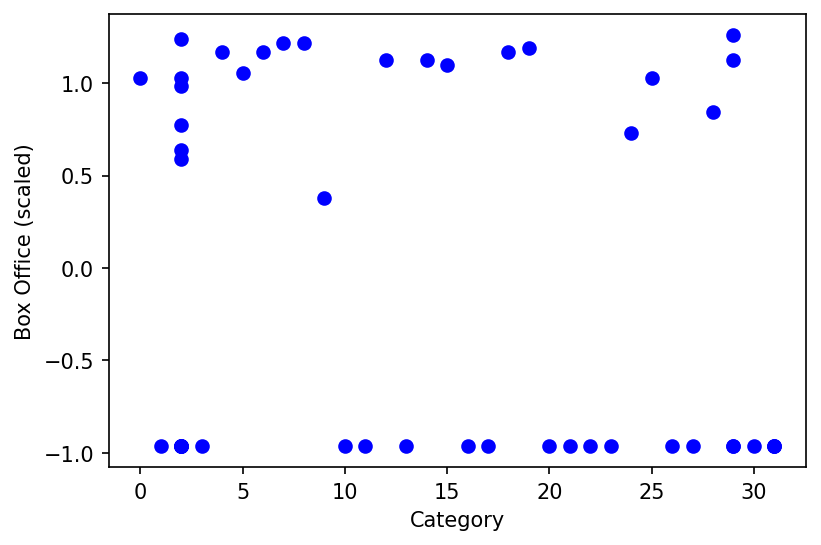

In [5]:
#Visualise data points
plt.figure(dpi=150)

plt.scatter(X["Category"],X["Box Office"],c='blue')
plt.xlabel('Category')
plt.ylabel('Box Office (scaled)')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\C-B cluster1.png',bbox_inches = 'tight')
plt.show()

<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Box Office')

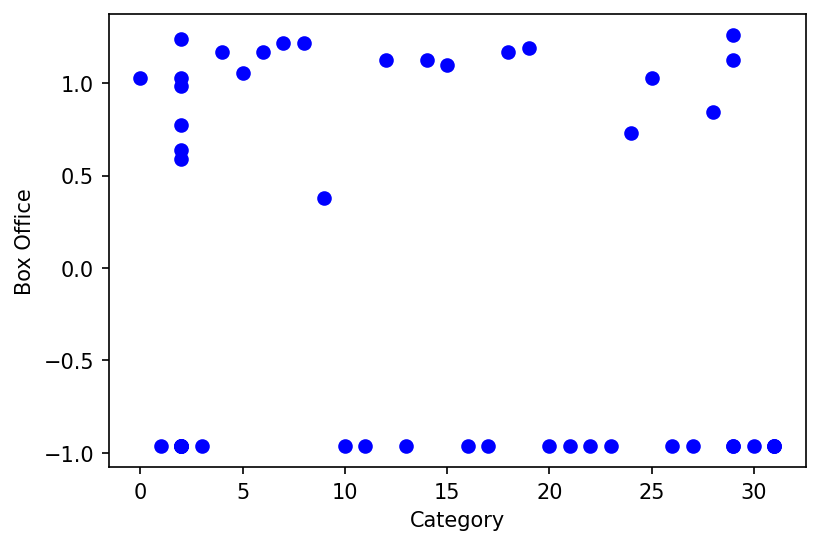

In [6]:
#Visualise data points
plt.figure(dpi=150)

plt.scatter(X["Category"],X["Box Office"],c='blue')
plt.xlabel('Category')
plt.ylabel('Box Office')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\C-B cluster2.png')
plt.show()

<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Box Office')

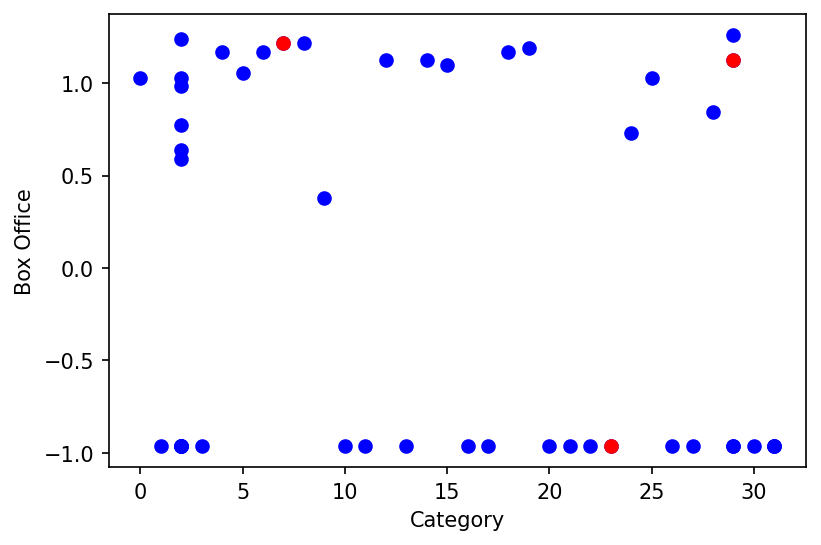

In [7]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K)) # 随机抽样三个点
plt.figure(dpi=150)

plt.scatter(X["Category"],X["Box Office"],c='blue')
plt.scatter(Centroids["Category"],Centroids["Box Office"],c='red')
plt.xlabel('Category')
plt.ylabel('Box Office')
plt.savefig('C:\\Users\AoSun\Desktop\cluster\C-B cluster3.png')
plt.show()

In [8]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1 
    for index1,row_c in Centroids.iterrows():
        ED=[]  # 记录每个点离质心的距离
        for index2,row_d in XD.iterrows():
            d1=(row_c["Category"]-row_d["Category"])**2
            d2=(row_c["Box Office"]-row_d["Box Office"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
           
        X[i]=ED  # 各个点离质心距离
        i=i+1
    
    C=[]
    for index,row in X.iterrows(): # 判断点离哪个质心最近
        min_dist=row[1]
        pos=1
        for i in range(K):  # i从0开始
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C   
    Centroids_new = X.groupby(["Cluster"]).mean()[["Box Office","Category"]]  # 求各簇的质心
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Box Office'] - Centroids['Box Office']).sum() + (Centroids_new['Category'] - Centroids['Category']).sum()
        print(diff.sum())  # 质心不再改变时停止
    Centroids = X.groupby(["Cluster"]).mean()[["Box Office","Category"]]

-2.4115015570238536
-1.702306318328771
-1.6473478340339145
-1.7220149243792735
0.0


C:\Users\AoSun\AppData\Local\Temp/ipykernel_22688/422666000.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED  # 各个点离质心距离


<Figure size 900x600 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Box Office')

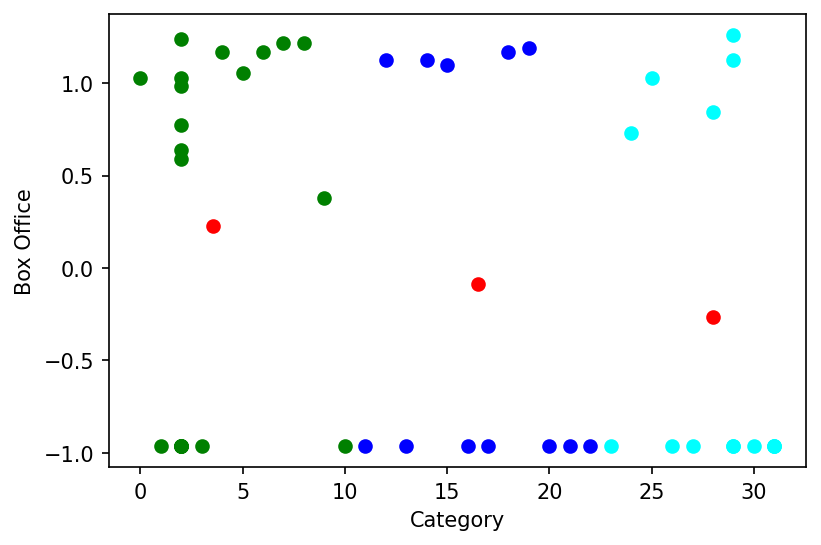

In [9]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4
plt.figure(dpi=150)

color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Category"],data["Box Office"],c=color[k])
plt.scatter(Centroids["Category"],Centroids["Box Office"],c='red')
plt.xlabel('Category')
plt.ylabel('Box Office')

plt.savefig('C:\\Users\AoSun\Desktop\cluster\C-B cluster4.png')
plt.show()